# Переобученная модель
Стоит задача написать модель, которая доходит до хорших метрик, но быстро начинает переобучаться

Импорт необходимых библиотек

In [2]:
%cd drive/MyDrive/YaMlProject/models/models

/content/drive/MyDrive/YaMlProject/models/models


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import sys

import numpy as np
from PIL import Image
import tensorflow as tf
import torchvision as tv
from livelossplot import PlotLossesKeras

sys.path.append('../../')

from core.datasets import get_ds

In [ ]:
!git add .
!git 

Создаем датасеты

In [6]:
train_ds, val_ds, test_ds = get_ds('repaired_data_train', 'repaired_data_test')

Пишем модель

In [8]:
model_retrain = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.AveragePooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.Dense(128),
])
model_retrain.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                        

Компиляция модели

In [9]:
model_retrain.compile(optimizer='adam', metrics=['accuracy'],
        loss=tf.keras.losses.SparseCategoricalCrossentropy())

Обучаем модель

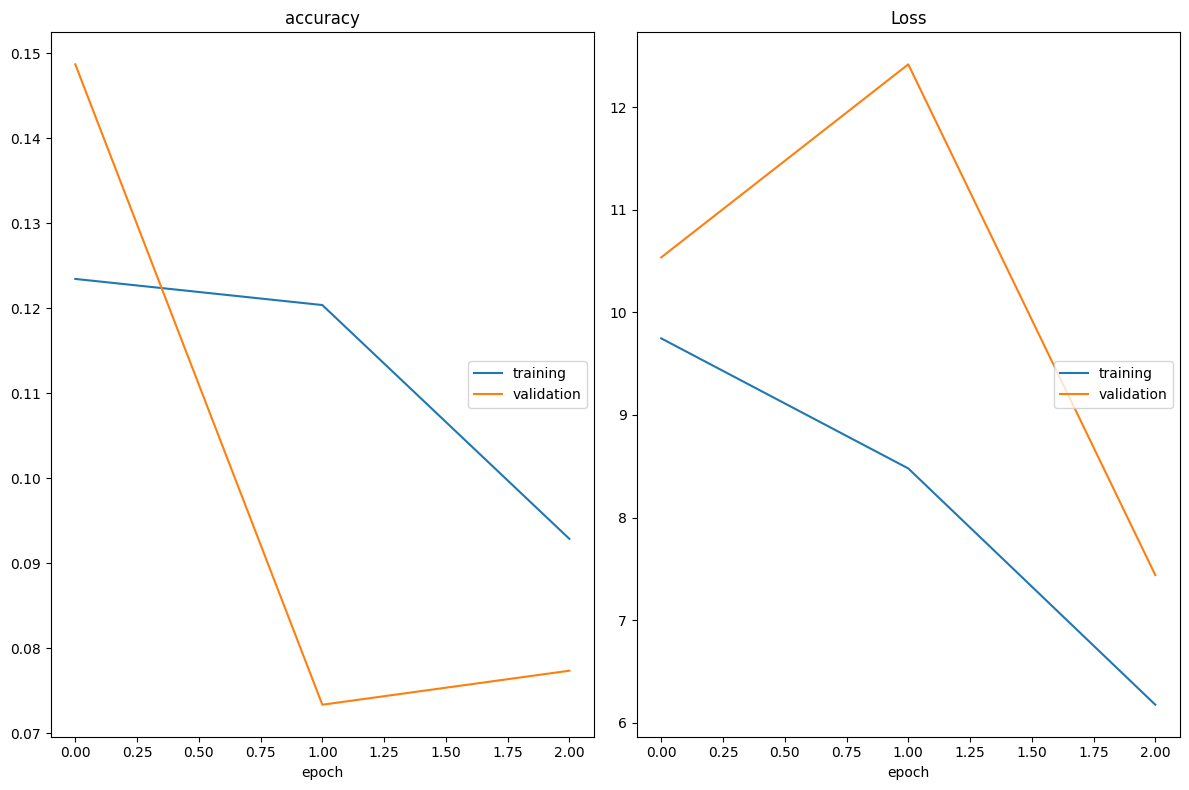

accuracy
	training         	 (min:    0.093, max:    0.123, cur:    0.093)
	validation       	 (min:    0.073, max:    0.149, cur:    0.077)
Loss
	training         	 (min:    6.175, max:    9.747, cur:    6.175)
	validation       	 (min:    7.440, max:   12.419, cur:    7.440)


KeyboardInterrupt: ignored

In [10]:
model_retrain.fit(train_ds, validation_data=val_ds, epochs=100,
          callbacks=[PlotLossesKeras()], verbose=False)